In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

train_features = pd.read_csv("../extract_new_feature/train_new_features.csv").sort_values(by='pid')
#test = pd.read_csv("extract_new_feature/test_imputed.csv").sort_values(by='pid')
train_labels = pd.read_csv("../../train_labels.csv").sort_values(by='pid')


In [2]:
train_labels.head()

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
6622,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.4,99.1,95.4,65.8
15008,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.8,78.8,97.4,71.8
16335,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.9,75.1,97.3,80.7
17676,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.7,112.8,97.0,92.6


In [3]:
train_features.head(13)

,ABPd_minimum,ABPd_maximum,ABPd_mean,ABPd_std,ABPd_median,ABPd_skewness,ABPd_kurtosis,ABPm_std,ABPm_skewness,ABPm_kurtosis,...,new_Heartrate_minimum,new_Heartrate_maximum,new_SpO2_mean,new_SpO2_median,new_SpO2_minimum,new_SpO2_maximum,new_ABPm_mean,new_ABPm_median,new_ABPm_minimum,new_ABPm_maximum
0,39.0,62.50,50.250000,7.101536,48.50,0.585977,-0.324842,8.315739,0.378826,0.740411,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,58.0,79.00,70.666664,6.582806,72.00,-0.654300,-0.527748,6.894772,-0.111329,-0.380230,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,40.0,70.00,51.333332,9.810323,50.00,1.156444,0.616139,29.218094,2.438059,6.784633,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,42.0,55.50,48.833332,3.472838,49.50,-0.191725,0.842687,4.555217,0.180480,-1.253473,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,90.5,142.00,108.833336,13.350746,107.50,1.305234,2.736731,14.169964,-0.242138,0.090806,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
5,64.0,99.00,83.833336,10.320618,83.50,-0.300499,-0.367147,10.121609,-0.048551,0.398230,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
6,48.0,68.00,56.791668,7.349886,56.25,0.175260,-1.740744,18.203188,0.884164,0.810203,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
7,64.0,69.75,66.520836,2.172813,66.00,0.620673,-1.041000,7.819943,1.025864,0.488319,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,58.0,58.00,58.000000,0.000000,58.00,0.000000,0.000000,9.478444,0.216039,-1.231882,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9,59.0,105.00,71.333336,11.934163,69.00,2.218312,6.296253,10.129465,0.476431,0.819088,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [4]:
VITALS = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']

In [5]:
# Let's now divide our training set into train and validation set

"""
Splitting the dataset into train 80% and  val 20%  
"""
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=2020)


In [6]:
X_train

,ABPd_minimum,ABPd_maximum,ABPd_mean,ABPd_std,ABPd_median,ABPd_skewness,ABPd_kurtosis,ABPm_std,ABPm_skewness,ABPm_kurtosis,...,new_Heartrate_minimum,new_Heartrate_maximum,new_SpO2_mean,new_SpO2_median,new_SpO2_minimum,new_SpO2_maximum,new_ABPm_mean,new_ABPm_median,new_ABPm_minimum,new_ABPm_maximum
17224,48.0,66.0,57.666668,6.257117,59.00,-0.389600,-0.981596,10.437040,-0.140870,-1.230289,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
17137,69.0,83.0,76.000000,7.311262,76.00,0.000000,-2.444444,10.444659,0.000000,-2.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4223,63.0,71.0,67.083336,2.874918,68.00,-0.182431,-1.780958,4.239068,-0.230729,-1.493051,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11373,45.0,57.0,50.416668,3.502164,49.75,0.288853,-0.346442,5.160309,0.293729,-1.228701,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
11602,38.0,54.0,45.250000,4.750598,44.50,0.509397,-0.278900,7.171070,0.509084,-0.659086,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18523,63.0,84.0,72.500000,5.616534,72.50,0.302934,0.446800,7.692480,-0.664392,-0.676614,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
11971,58.0,58.0,58.000000,0.000000,58.00,0.000000,0.000000,11.657681,0.410565,-0.599036,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14966,54.0,65.0,58.916668,3.794933,59.00,0.327079,-0.786035,7.619751,0.223625,0.949997,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
7491,52.0,80.0,67.416664,7.633161,68.00,-0.307349,0.622019,10.879505,-0.559628,1.319200,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [7]:
y_train

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
12441,28719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.1,89.4,96.3,77.4
12341,28562,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,104.6,94.6,85.6
16990,6987,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.5,91.9,95.3,72.0
5917,18916,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,68.7,96.8,90.2
6175,19319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9,61.7,96.7,71.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13883,30867,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.8,97.2,99.6,73.8
6585,19950,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,22.6,100.5,99.0,83.2
9916,24936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.2,80.2,95.6,92.2
1619,12410,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,16.1,83.8,97.0,83.2


In [8]:
feature_cols = X_train.columns.values[(X_train.columns.values != 'pid') & (X_train.columns.values != 'Time')]

X_train = X_train[feature_cols]
X_val = X_val[feature_cols]


In [9]:
# Regression models for comparison
'''
models is a list containing the objects for ML algorithms.
results is a dictionary where key is algorithm name and value is MAE.
We train for each model and predict on Val.
We use the ground truth and predictions to calculate MAE.
The MAE's for each model are stored in results.
'''
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

ml_models = [LinearRegression(),
          GradientBoostingRegressor(random_state = 0), 
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0),
          SVR()]



VITALS = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']


def regression(label):
    
    results = {}
    for model in ml_models:

        # Instantiate and fit Regressor Model
        reg_model = model
        reg_model.fit(X_train, y_train[label])

        # Make predictions with model
        y_test_preds = reg_model.predict(X_val)

        # Grab model name and store results associated with model
        name = str(model).split("(")[0]

        results[name] = r2_score(y_val[label], y_test_preds)
        print('{} done.'.format(name))


    print('R2 score')
    for i in results.keys():
        print('{} : {}'.format(i,results[i]))

    # Plot barplot for MAE

    ind = range(len(results))
    max_r2 = max(results.values())

    fig = plt.figure(figsize=(15,6))
    ax = fig.subplots()
    ax.bar(ind, list(results.values()), align='center', 
            color = 'lightblue', alpha=0.8)
    plt.xticks(ind, results.keys())
    ax.axhline(y=max_r2, xmin=0, xmax=100, ls='-', color='red')
    plt.show()

LABEL_RRate
LinearRegression done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
R2 score
LinearRegression : 0.3403549530484855
GradientBoostingRegressor : 0.40668195947682007
KNeighborsRegressor : -0.03394667550833508
RandomForestRegressor : 0.39682769830057163
SVR : 0.16238785880606943


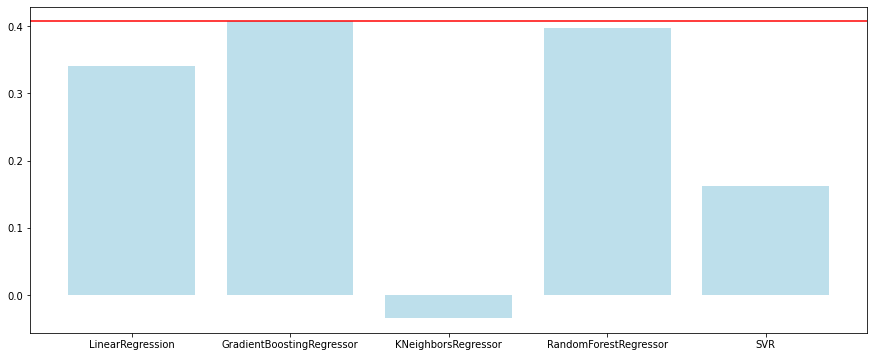

'\nLABEL_RRate\nLinearRegression done.\nGradientBoostingRegressor done.\nKNeighborsRegressor done.\nRandomForestRegressor done.\nSVR done.\nR2 score\nLinearRegression : 0.346292396049945\nGradientBoostingRegressor : 0.40853105319770444\nKNeighborsRegressor : -0.04090803120945519\nRandomForestRegressor : 0.3979781097577445\nSVR : 0.18327352032804545\n\n'

In [10]:
label = VITALS[0]
print (label)
regression(label)



'''
LABEL_RRate
LinearRegression done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
R2 score
LinearRegression : 0.346292396049945
GradientBoostingRegressor : 0.40853105319770444
KNeighborsRegressor : -0.04090803120945519
RandomForestRegressor : 0.3979781097577445
SVR : 0.18327352032804545

'''

########## LABEL_ABPm ###########
LinearRegression done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
R2 score
LinearRegression : 0.5355133422299326
GradientBoostingRegressor : 0.5770109080727162
KNeighborsRegressor : 0.3663793735951584
RandomForestRegressor : 0.5787797483624637
SVR : 0.46189711917927057


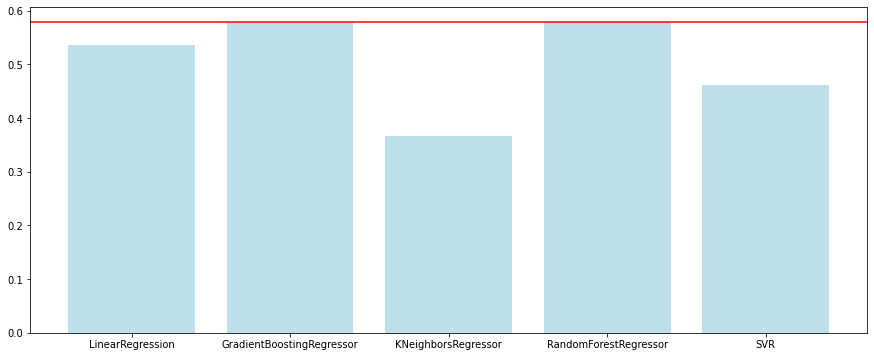

'\n########## LABEL_ABPm ###########\nLinearRegression done.\nGradientBoostingRegressor done.\nKNeighborsRegressor done.\nRandomForestRegressor done.\nSVR done.\nR2 score\nLinearRegression : 0.592904590103991\nGradientBoostingRegressor : 0.6079879627877394\nKNeighborsRegressor : 0.4370851907863198\nRandomForestRegressor : 0.60514847180928\nSVR : 0.5391456017012313\n\n'

In [11]:
label = VITALS[1]
print ("##########",label,"###########")
regression(label)



'''
########## LABEL_ABPm ###########
LinearRegression done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
R2 score
LinearRegression : 0.592904590103991
GradientBoostingRegressor : 0.6079879627877394
KNeighborsRegressor : 0.4370851907863198
RandomForestRegressor : 0.60514847180928
SVR : 0.5391456017012313

'''

LABEL_SpO2
LinearRegression done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
R2 score
LinearRegression : 0.13038367362027603
GradientBoostingRegressor : 0.18736273113320823
KNeighborsRegressor : -0.09461131720767924
RandomForestRegressor : 0.20812343741606065
SVR : 0.02186662976122289


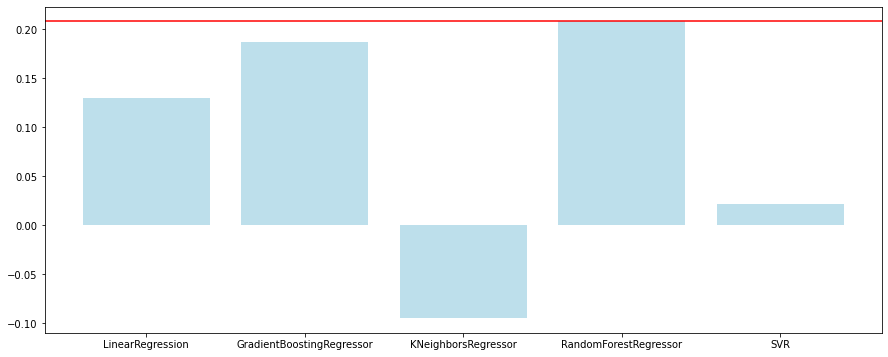

'\nLABEL_SpO2\nLinearRegression done.\nGradientBoostingRegressor done.\nKNeighborsRegressor done.\nRandomForestRegressor done.\nSVR done.\nR2 score\nLinearRegression : 0.45433326748317515\nGradientBoostingRegressor : 0.3981090074027216\nKNeighborsRegressor : -0.06081644405509867\nRandomForestRegressor : 0.37723587380543366\nSVR : 0.11255840204357526\n\n'

In [12]:
label = VITALS[2]
print (label)
regression(label)


'''
LABEL_SpO2
LinearRegression done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
R2 score
LinearRegression : 0.45433326748317515
GradientBoostingRegressor : 0.3981090074027216
KNeighborsRegressor : -0.06081644405509867
RandomForestRegressor : 0.37723587380543366
SVR : 0.11255840204357526

'''

LABEL_Heartrate
LinearRegression done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
R2 score
LinearRegression : 0.3332672202834768
GradientBoostingRegressor : 0.4205772249649459
KNeighborsRegressor : -0.10927482958125068
RandomForestRegressor : 0.4371498589844497
SVR : 0.0453431186073715


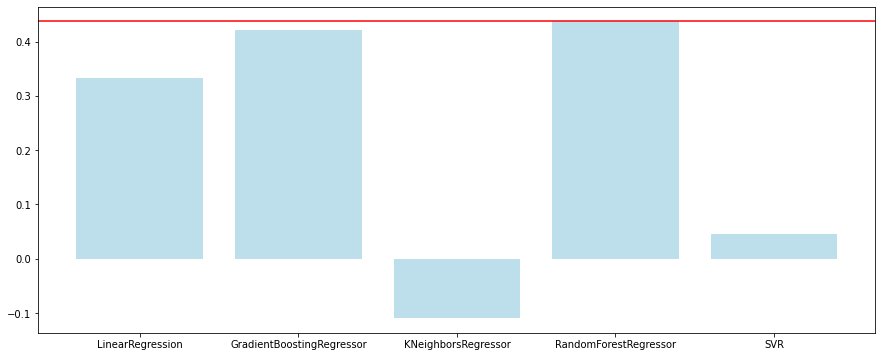

'\nLABEL_Heartrate\nLinearRegression done.\nGradientBoostingRegressor done.\nKNeighborsRegressor done.\nRandomForestRegressor done.\nSVR done.\nR2 score\nLinearRegression : 0.593564254367609\nGradientBoostingRegressor : 0.624227589085022\nKNeighborsRegressor : 0.3943120087391996\nRandomForestRegressor : 0.6147944170621644\nSVR : 0.5295699779291231\n\n\n'

In [13]:
label = VITALS[3]
print (label)
regression(label)


'''
LABEL_Heartrate
LinearRegression done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
R2 score
LinearRegression : 0.593564254367609
GradientBoostingRegressor : 0.624227589085022
KNeighborsRegressor : 0.3943120087391996
RandomForestRegressor : 0.6147944170621644
SVR : 0.5295699779291231


'''

In [14]:
# 3. Ridge regression using all features


from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


alpha = [0, 1000, 10000, 40000, 90000, 100000]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)


for label in VITALS:
    
    print ("Target = ", label)
    y_temp = y_train[label]
    for i in alpha:
        model = Ridge(alpha = i, fit_intercept = False)
        print("Alpha = ", i, "R2 score = ", np.mean(cross_val_score(model, X_train, y_temp, cv=10, scoring = 'r2')))
    

    
'''

Target =  LABEL_RRate
Alpha =  0.1 R2 score =  -10.86111657439984
Alpha =  1 R2 score =  -11.98977482355494
Alpha =  10 R2 score =  -8.622023360577263
Alpha =  1000 R2 score =  0.3833156346672817
Alpha =  10000 R2 score =  0.3885456610947021
Alpha =  40000 R2 score =  0.38892500213972137
Alpha =  90000 R2 score =  0.3858134922593838
Alpha =  100000 R2 score =  0.38499156970780685
Target =  LABEL_ABPm
Alpha =  0.1 R2 score =  -55.96038837039049
Alpha =  1 R2 score =  -56.90985564619338
Alpha =  10 R2 score =  -55.984600720901724
Alpha =  1000 R2 score =  -3.053959115227792
Alpha =  10000 R2 score =  0.5031267093430214
Alpha =  40000 R2 score =  0.5838715357512532
Alpha =  90000 R2 score =  0.588713763227594
Alpha =  100000 R2 score =  0.5888388017361061
Target =  LABEL_SpO2
Alpha =  0.1 R2 score =  -138.938104289817
Alpha =  1 R2 score =  -173.26384941090583
Alpha =  10 R2 score =  -172.57771289828378
Alpha =  1000 R2 score =  -9.847322628863363
Alpha =  10000 R2 score =  0.095101795462909
Alpha =  40000 R2 score =  0.2745952852313543
Alpha =  90000 R2 score =  0.24866806922253915
Alpha =  100000 R2 score =  0.2419201429396946
Target =  LABEL_Heartrate
Alpha =  0.1 R2 score =  0.3139765976527324
Alpha =  1 R2 score =  0.17145912150564943
Alpha =  10 R2 score =  0.13128863914438416
Alpha =  1000 R2 score =  0.5829783084089712
Alpha =  10000 R2 score =  0.6223412979739278
Alpha =  40000 R2 score =  0.6218643531121091
Alpha =  90000 R2 score =  0.6210104852686391
Alpha =  100000 R2 score =  0.620861296704975

    
'''

Target =  LABEL_RRate
Alpha =  0 R2 score =  -7.091859862189429
Alpha =  1000 R2 score =  0.38503580069889437
Alpha =  10000 R2 score =  0.3818761826198086
Alpha =  40000 R2 score =  0.38197267265196355
Alpha =  90000 R2 score =  0.37845794844997915
Alpha =  100000 R2 score =  0.3775774769182202
Target =  LABEL_ABPm
Alpha =  0 R2 score =  -41.02132987719453
Alpha =  1000 R2 score =  -2.9103086925695254
Alpha =  10000 R2 score =  0.42068178250490834
Alpha =  40000 R2 score =  0.5092601378141206
Alpha =  90000 R2 score =  0.514514359403631
Alpha =  100000 R2 score =  0.514668614488365
Target =  LABEL_SpO2
Alpha =  0 R2 score =  -108.85744678871995
Alpha =  1000 R2 score =  -5.414518237511741
Alpha =  10000 R2 score =  -0.5721109519246659
Alpha =  40000 R2 score =  -0.7535839689635764
Alpha =  90000 R2 score =  -0.8347272021875621
Alpha =  100000 R2 score =  -0.8448354558448059
Target =  LABEL_Heartrate
Alpha =  0 R2 score =  -2.008427813998739
Alpha =  1000 R2 score =  0.1973813928081653

'\n\nTarget =  LABEL_RRate\nAlpha =  0.1 R2 score =  -10.86111657439984\nAlpha =  1 R2 score =  -11.98977482355494\nAlpha =  10 R2 score =  -8.622023360577263\nAlpha =  1000 R2 score =  0.3833156346672817\nAlpha =  10000 R2 score =  0.3885456610947021\nAlpha =  40000 R2 score =  0.38892500213972137\nAlpha =  90000 R2 score =  0.3858134922593838\nAlpha =  100000 R2 score =  0.38499156970780685\nTarget =  LABEL_ABPm\nAlpha =  0.1 R2 score =  -55.96038837039049\nAlpha =  1 R2 score =  -56.90985564619338\nAlpha =  10 R2 score =  -55.984600720901724\nAlpha =  1000 R2 score =  -3.053959115227792\nAlpha =  10000 R2 score =  0.5031267093430214\nAlpha =  40000 R2 score =  0.5838715357512532\nAlpha =  90000 R2 score =  0.588713763227594\nAlpha =  100000 R2 score =  0.5888388017361061\nTarget =  LABEL_SpO2\nAlpha =  0.1 R2 score =  -138.938104289817\nAlpha =  1 R2 score =  -173.26384941090583\nAlpha =  10 R2 score =  -172.57771289828378\nAlpha =  1000 R2 score =  -9.847322628863363\nAlpha =  1000

In [ ]:
\# Let's tune our Random Forest regressor for hyperparameters

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


VITALS = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']


for label in VITALS:
    
    print(label)
    
    reg = RandomForestRegressor(random_state=42)
    
    param_grid = { 
    'n_estimators': [1000]}    
    
    CV_rf = GridSearchCV(estimator=reg, param_grid=param_grid, cv = 5, scoring = 'r2', n_jobs = -1)
    
    CV_rf.fit(X_train, y_train[label])
    
    y_pred = CV_rf.predict(X_val)
    
    print("Best parameters after Grid Search CV")
        
    print(CV_rf.best_params_)                  
        
    R2_score = r2_score(y_val[label], y_pred)
    
    print("R2 score with best parameters = ", R2_score)
    
    print("----------------------------------------------")
    
    
'''
LABEL_RRate
Best parameters after Grid Search CV
{'n_estimators': 400}
R2 score with best parameters =  0.40483515650529134
----------------------------------------------
LABEL_ABPm
Best parameters after Grid Search CV
{'n_estimators': 400}
R2 score with best parameters =  0.6073676454810253
----------------------------------------------
LABEL_SpO2
Best parameters after Grid Search CV
{'n_estimators': 400}
R2 score with best parameters =  0.3896437001125159
----------------------------------------------
LABEL_Heartrate
Best parameters after Grid Search CV
{'n_estimators': 400}
R2 score with best parameters =  0.6191019592726559
----------------------------------------------

'''

In [ ]:
# Let's see if n_estimators = 200 is good enough for us

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


VITALS = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']


for label in VITALS:
    
    print(label)
    
    if label == 'LABEL_SpO2':
        lreg = LinearRegression().fit(X_train, y_train[label])
        y_pred = lreg.predict(X_val)
        R2_score = r2_score(y_val[label], y_pred)
        print("R2 score = ", R2_score)
    
        print("----------------------------------------------")
        
        
    else:
        
        reg = RandomForestRegressor(n_estimators = 200, random_state=42)

        reg.fit(X_train, y_train[label])

        y_pred = reg.predict(X_val)             

        R2_score = r2_score(y_val[label], y_pred)

        print("R2 score = ", R2_score)

        print("----------------------------------------------")

In [ ]:
## Conclusions 

## There is hardly any change in R2 score when n_estimators are changed from 400 to 200. So we will go with 200 estimators. 

In [ ]:
# 1. Simple Linear regression using all features
'''
from sklearn.linear_model import LinearRegression

for label in VITALS:
    print ("Target = ", label)
    y_temp = y_train[label]
    reg = LinearRegression().fit(X_train, y_temp) # fitting the data
    print("training score = ", reg.score(X_train, y_temp))  # How well do we fit


Target =  LABEL_RRate
training score =  0.4101943384913194
Target =  LABEL_ABPm
training score =  0.6030440190107336
Target =  LABEL_SpO2
training score =  0.37633609527438916
Target =  LABEL_Heartrate
training score =  0.6303946090937576
'''

# Score on validation set 



from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for label in VITALS:
    print ("Target = ", label)
    y_temp = y_train[label]
    reg = LinearRegression().fit(X_train, y_temp) # fitting the data
    y_pred_val = reg.predict(X_val)  
    print("R2 score = ", r2_score(y_val[label], y_pred_val))
  
'''
Target =  LABEL_RRate
R2 score =  0.36043130617783037
Target =  LABEL_ABPm
R2 score =  0.5981269926232222
Target =  LABEL_SpO2
R2 score =  0.4629634518153568
Target =  LABEL_Heartrate
R2 score =  0.6023979649232624


'''

In [ ]:
# 3. Ridge regression using only one feature


'''
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_train_temp = X_train['RRate']
X_train_temp = X_train_temp[:, np.newaxis]
y_train_temp = y_train['LABEL_RRate']

alpha = [1, 10, 100, 200, 300, 500, 1000, 2000, 10000]

for label in VITALS:
    print ("Target = ", label)
    y_temp = y_train[label]
    for i in alpha:
        print ("Alpha = ",i)
        model = Ridge(alpha = i, fit_intercept = True)
        print(np.mean(cross_val_score(model, X_train_temp, y_train_temp, cv=5, scoring = 'r2')))
    break
    
Target =  LABEL_RRate
Alpha =  1
0.3730519805372717
Alpha =  10
0.37305199140415507
Alpha =  100
0.373052009980947
Alpha =  200
0.3730518389036903
Alpha =  300
0.3730514666259451
Alpha =  500
0.3730501209755694
Alpha =  1000
0.37304327950197713
Alpha =  2000
0.3730149544282296
Alpha =  10000
0.3721505170640766
'''